In [19]:
import numpy as np
import pandas as pd
import talib
import random
random.seed(42)

In [20]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [22]:
from pandas_datareader import data as pdr
dataset = pdr.get_data_yahoo('NVDA', '2017-01-18', '2018-02-07')
#df = df.dropna()
#df = df.iloc[:,:4]
dataset = dataset.dropna()
dataset = dataset[['Open', 'High', 'Low', 'Close','Volume']]
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-17,103.000000,103.199997,100.570000,101.110001,14515300.0
2017-01-18,100.239998,103.230003,99.110001,102.949997,16360600.0
2017-01-19,103.070000,106.459999,102.980003,105.160004,16121800.0
2017-01-20,106.080002,106.800003,103.120003,104.010002,12300600.0
2017-01-23,103.800003,105.900002,103.699997,105.089996,9247600.0


In [23]:
close=dataset['Close'].values
open=dataset['Open'].values
high=dataset['High'].values
low=dataset['Low'].values
volume=dataset['Volume'].values.astype(float)

In [24]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)


In [25]:
dataset['ADX'] = talib.ADX(high, low, close, timeperiod=14)
dataset['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
dataset['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
dataset['AROONSC'] = talib.AROONOSC(high, low, timeperiod=14)
dataset['BOP'] = talib.BOP(open, high, low, close)
dataset['CMO'] = talib.CMO(close, timeperiod=14)
dataset['DX'] = talib.DX(high, low, close, timeperiod=14)
dataset['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
dataset['MOM'] = talib.MOM(close, timeperiod=10)
dataset['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
dataset['ROC'] = talib.ROC(close, timeperiod=10)
dataset['RSI'] = talib.RSI(close, timeperiod=14)
dataset['TRIX']= talib.TRIX(close, timeperiod=30)
dataset['ULTSOC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
dataset['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
dataset['AD'] = talib.AD(high, low, close, volume)
dataset['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
dataset['OBV'] = talib.OBV(close, volume)
dataset['DEMA'] = talib.DEMA(close, timeperiod=30)
dataset['KAMA'] = talib.KAMA(close, timeperiod=30)
dataset['SAR'] = talib.SAR(high, low, acceleration=0, maximum=0)
dataset['TEMA'] = talib.TEMA(close, timeperiod=30)
dataset['TRIMA'] = talib.TRIMA(close, timeperiod=30)
dataset['WMA'] = talib.WMA(close, timeperiod=30)
dataset['CCI'] = talib.CCI(high, low, close, timeperiod=14)

In [26]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]


In [27]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test, type(X_test[1][1]))

[[-0.78841486 -0.01326535  0.70982172 ...  2.25474227  1.90753272
   1.89087974]
 [-0.78041464 -0.82275509  0.1059845  ...  2.29633002  1.93660412
   1.91617244]
 [-0.89104449 -0.29555269 -0.7421848  ...  2.31973028  1.96433549
   1.93745465]
 ...
 [ 1.211911   10.01611581 -4.66189938 ...  3.51315429  2.54371441
   2.57092925]
 [ 1.08081764  7.30535926  7.37299406 ...  3.43159728  2.59439264
   2.57916486]
 [ 0.26969506  1.73025247 -0.29192057 ...  3.38688647  2.64241194
   2.5918198 ]] <class 'numpy.float64'>


In [29]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
214/214 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
214/214 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
214/214 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
214/214 [==============================] - 0s 230us/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
214/214 [==============================] - 0s 215us/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
214/214 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
214/214 [==============================] - 0s 215us/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
214/214 [==============================] - 0s 224us/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
214/214 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
214/214 [==============================] - 0s 243us/step - loss: nan - acc: 0.0000e+00
Epoch 11/10

214/214 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 84/100
214/214 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 85/100
214/214 [==============================] - 0s 224us/step - loss: nan - acc: 0.0000e+00
Epoch 86/100
214/214 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 87/100
214/214 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 88/100
214/214 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 89/100
214/214 [==============================] - 0s 215us/step - loss: nan - acc: 0.0000e+00
Epoch 90/100
214/214 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 91/100
214/214 [==============================] - 0s 224us/step - loss: nan - acc: 0.0000e+00
Epoch 92/100
214/214 [==============================] - 0s 229us/step - loss: nan - acc: 0.0000e+00
Epoch 93/100


In [30]:
y_pred = classifier.predict(X_test)
print("y_pred classifier: ",y_pred)
y_pred = (y_pred > 0.5)

y_pred classifier:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [32]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [33]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


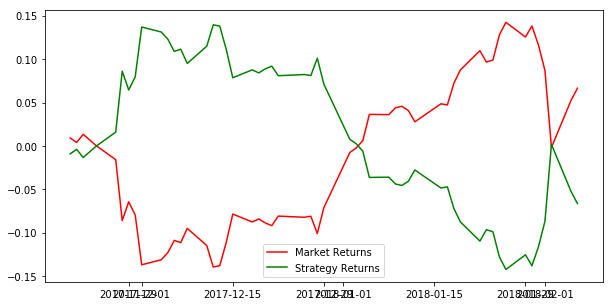

In [35]:
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [36]:
trade_dataset['tradedate']=trade_dataset.index.copy()

trade_dataset['Strategy Returns Buy Date'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['tradedate'], trade_dataset['tradedate'].shift(-1))
trade_dataset['Strategy Returns Sell Date'] = np.where(trade_dataset['y_pred'] == False, trade_dataset['tradedate'], trade_dataset['tradedate'].shift(-1))

C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ganihar\Anaconda3\envs\wqu_ml_fin\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

In [103]:
trade_dataset['Strategy Returns Buy Date'].head(15)

50    2019-06-13
51    2019-06-14
52    2019-06-17
53    2019-06-18
54    2019-06-19
55    2019-06-20
56    2019-06-21
57    2019-06-24
58    2019-06-25
59    2019-06-26
60    2019-06-27
61    2019-06-28
62           NaN
Name: Strategy Returns Buy Date, dtype: object